<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB
None
count    107833.000000
mean         48.733013
std         117.135562
min           0.000000
25%           0.000000
50%          14.000000
75%          43.000000
max        3451.000000
Name: target, dtype: float64


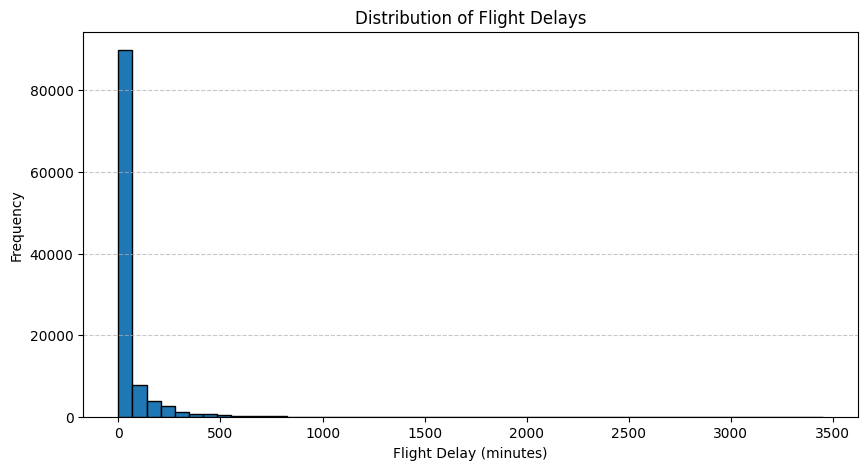

Skewness of delay distribution: 8.433569324548655
delay_category
On-time (0 min)               35.395473
Moderate Delay (16-60 min)    28.815854
Short Delay (1-15 min)        17.931431
Long Delay (1-3 hours)        11.315645
Extreme Delay (3+ hours)       6.541597
Name: proportion, dtype: float64


/var/folders/ch/m_r4gx2901zdngn7fs_1cpm80000gn/T/ipykernel_1199/1671350686.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="Blues_r")


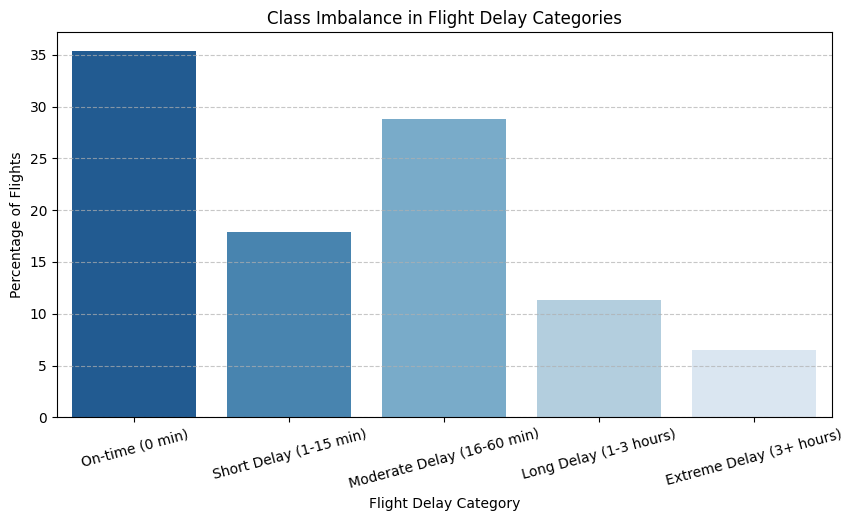

In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "Train.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.info())

# Describe the target column (flight delay in minutes)
print(df["target"].describe())

# Plot histogram to visualize the distribution of delays
plt.figure(figsize=(10,5))
plt.hist(df["target"], bins=50, edgecolor="black")
plt.xlabel("Flight Delay (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Flight Delays")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Check skewness (to see if the distribution is highly imbalanced)
from scipy.stats import skew
print("Skewness of delay distribution:", skew(df["target"]))

# Create delay categories to check class imbalance
df["delay_category"] = pd.cut(
    df["target"],
    bins=[-1, 0, 15, 60, 180, df["target"].max()],  # Delay bins
    labels=["On-time (0 min)", "Short Delay (1-15 min)", "Moderate Delay (16-60 min)", "Long Delay (1-3 hours)", "Extreme Delay (3+ hours)"]
)

# Count class distribution
class_distribution = df["delay_category"].value_counts(normalize=True) * 100
print(class_distribution)

# Plot class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="Blues_r")
plt.xlabel("Flight Delay Category")
plt.ylabel("Percentage of Flights")
plt.title("Class Imbalance in Flight Delay Categories")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
